# Week4授業課題 信用情報の学習

## 【問題1】コンペティション内容の確認

コンペティションのOverviewページ読み、「Home Credit Default Risk」について以下の観点について確認してください。


何を学習し、何を予測するのか
どのようなファイルを作りKaggleに提出するか
提出されたものはどういった指標値で評価されるのか

### 何を学習し、何を予測するのか

電話会社や取引情報などのさまざまな代替データを利用して、クライアントの返済能力を予測する。

### どのようなファイルを作りKaggleに提出するか

ヘッダーが含まれ、SK_ID_CURRごとにTARGET変数の確率を予測したデータ。

### 提出されたものはどういった指標値で評価されるのか

ROC曲線の面積で評価する。

## 【問題2】学習と検証
データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行してください。  
検証にはこのコンペティションで使用される評価指標を用いるようにしてください。学習に用いる手法は指定しません。

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import mean_squared_error
%matplotlib inline 

In [2]:
df = pd.read_csv("dataset/application_train.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [6]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [39]:
# int/floatとobjectを分離
df_tmp = df
list_str=[] 

for i in df_tmp.columns:
    if df_tmp[i].dtypes == 'O':
        df_tmp = df_tmp.drop([i], axis = 1)
        list_str.append(i)

In [8]:
# int/floatの欠損値を0で置換して確認

df_tmp = df_tmp.replace(np.nan,0)


In [9]:
df_tmp

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# objectをダミー変数に変換
df_str = df[list_str]
df_str_dummy = pd.get_dummies(df_str)
df_str_dummy.describe()

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.904787,0.095213,0.658344,0.341643,0.000013,0.659892,0.340108,0.306327,0.693673,0.010624,...,0.003941,0.030090,0.007466,0.005785,0.005284,0.214757,0.210773,0.017437,0.518446,0.007570
std,0.293509,0.293509,0.474266,0.474261,0.003607,0.473746,0.473746,0.460968,0.460968,0.102524,...,0.062656,0.170835,0.086085,0.075840,0.072501,0.410654,0.407858,0.130892,0.499660,0.086679
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#object(ダミー変数に変換)と、int/float(欠損値を０で置換)を結合
df_mix = pd.concat([df_tmp, df_str_dummy], axis=1)
display(df_mix.describe())
display(df_mix.info())

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27107.516051,5.379095e+05,0.020868,-16036.995067,63815.045904,...,0.003941,0.030090,0.007466,0.005785,0.005284,0.214757,0.210773,0.017437,0.518446,0.007570
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14494.443757,3.696338e+05,0.013831,4363.988632,141275.766519,...,0.062656,0.170835,0.086085,0.075840,0.072501,0.410654,0.407858,0.130892,0.499660,0.086679
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,0.000000,0.000000e+00,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 246 entries, SK_ID_CURR to EMERGENCYSTATE_MODE_Yes
dtypes: float64(65), int64(41), uint8(140)
memory usage: 289.7 MB


None

In [213]:
# TARGETとの相関係数の絶対値が0.05以上のデータを抽出
from scipy.stats import pearsonr

list_i = []
for i in df_mix.columns: #8
    a, b = pearsonr(df_mix[i], df_mix["TARGET"])
    if 0.05 < abs(a) :
        list_i.append(i)
        print("{}, {:.2f}".format(i, a))

# 対象とする特徴量のリスト
features_list = list_i
base_features_list = features_list # ベースラインモデル特徴量

TARGET, 1.00
DAYS_BIRTH, 0.08
DAYS_ID_PUBLISH, 0.05
REGION_RATING_CLIENT, 0.06
REGION_RATING_CLIENT_W_CITY, 0.06
REG_CITY_NOT_WORK_CITY, 0.05
EXT_SOURCE_1, -0.06
EXT_SOURCE_2, -0.16
EXT_SOURCE_3, -0.12
DAYS_LAST_PHONE_CHANGE, 0.06
CODE_GENDER_F, -0.05
CODE_GENDER_M, 0.05
NAME_INCOME_TYPE_Working, 0.06
NAME_EDUCATION_TYPE_Higher education, -0.06


In [13]:
# 対象の列を指定
df_mix.loc[:,features_list]

,TARGET,DAYS_BIRTH,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,CODE_GENDER_F,CODE_GENDER_M,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education
0,1,-9461,-2120,2,2,0,0.083037,0.262949,0.139376,-1134.0,0,1,1,0
1,0,-16765,-291,1,1,0,0.311267,0.622246,0.000000,-828.0,1,0,0,1
2,0,-19046,-2531,2,2,0,0.000000,0.555912,0.729567,-815.0,0,1,1,0
3,0,-19005,-2437,2,2,0,0.000000,0.650442,0.000000,-617.0,1,0,1,0
4,0,-19932,-3458,2,2,1,0.000000,0.322738,0.000000,-1106.0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,-9327,-1982,1,1,0,0.145570,0.681632,0.000000,-273.0,0,1,1,0
307507,0,-20775,-4090,2,2,0,0.000000,0.115992,0.000000,0.0,1,0,0,0
307508,0,-14966,-5150,3,3,1,0.744026,0.535722,0.218859,-1909.0,1,0,1,1
307509,1,-11961,-931,2,2,1,0.000000,0.514163,0.661024,-322.0,1,0,0,0


In [14]:
df_select = df_mix.loc[:, features_list]
df_extract = df_select[(df['TARGET'] == 1)]

In [15]:
df_extract

,TARGET,DAYS_BIRTH,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,CODE_GENDER_F,CODE_GENDER_M,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education
0,1,-9461,-2120,2,2,0,0.083037,0.262949,0.139376,-1134.0,0,1,1,0
26,1,-18724,-1827,3,2,0,0.000000,0.548477,0.190706,-161.0,1,0,1,0
40,1,-17482,-1029,2,2,0,0.000000,0.306841,0.320163,-1075.0,0,1,0,0
42,1,-13384,-4409,3,3,0,0.468208,0.674203,0.399676,-1480.0,1,0,1,0
81,1,-24794,-4199,2,2,0,0.000000,0.023952,0.720944,0.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,1,-9918,-2580,3,3,0,0.073452,0.329708,0.360613,-324.0,0,1,1,0
307475,1,-13416,-4704,2,2,0,0.634729,0.583214,0.424130,-1492.0,1,0,1,1
307481,1,-20644,-3832,2,2,0,0.000000,0.713524,0.511892,-2941.0,0,1,1,0
307489,1,-16471,-9,2,2,0,0.000000,0.615261,0.397946,-307.0,1,0,0,0


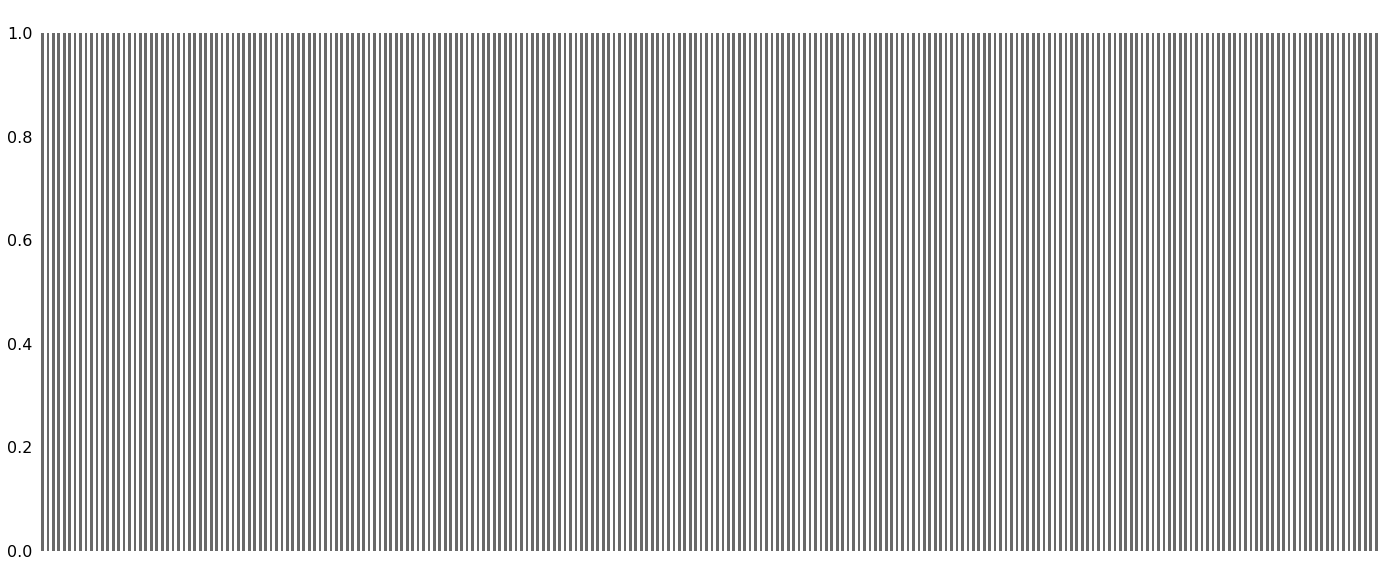

In [16]:
msno.bar(df_mix)

In [17]:
# 特徴量と目的変数を格納
X = df_mix[features_list].drop(['TARGET'], axis=1)
y = df_mix[['TARGET']]

# ndarrayに変換
X = X.values
y = y.values

In [18]:
# 欠損値を0で埋める
# df_zero = df_mix.replace(np.nan,0)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

In [20]:
print("X_train：", np.shape(X_train))
print("X_test：", np.shape(X_test))
print("y_train：", np.shape(y_train))
print("y_test：", np.shape(y_test))

X_train： (230633, 13)
X_test： (76878, 13)
y_train： (230633, 1)
y_test： (76878, 1)


In [21]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [22]:
#最近傍法
from sklearn.neighbors import KNeighborsClassifier

# 5-nn
nn_5 = KNeighborsClassifier()
nn_5.fit(X_train_std, y_train.ravel())
#y_predict = nn_5.predict_proba(X_test_std)[:,1]
y_predict = nn_5.predict(X_test_std)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_predict)

0.5158670785990739

In [24]:
#ロジスティック回帰
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=0, solver='lbfgs')
logistic.fit(X_train_std, y_train.ravel())
y_predict_logistic = logistic.predict_proba(X_test_std)[:,1]
y_predict_logistic

array([0.1332797 , 0.01738122, 0.08715392, ..., 0.03069435, 0.20359368,
       0.05232589])

In [25]:
roc_auc_score(y_test, y_predict_logistic)

0.7134395943245833

In [26]:
#SVM （計算が終わらないため使用せず）
'''
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_std, y_train)
y_predict_svc = svc.predict(X_train_std.ravel())
#  グラフ化
decision_region(X_train_std, y_train, model=svc, step=0.01, title='decision region / SVC',
                xlabel="sepal length", ylabel="petal length")
'''

'\nfrom sklearn.svm import SVC\nsvc = SVC()\nsvc.fit(X_train_std, y_train)\ny_predict_svc = svc.predict(X_train_std.ravel())\n#  グラフ化\ndecision_region(X_train_std, y_train, model=svc, step=0.01, title=\'decision region / SVC\',\n                xlabel="sepal length", ylabel="petal length")\n'

In [27]:
''' roc_auc_score(y_test, y_predict_svc) '''

' roc_auc_score(y_test, y_predict_svc) '

In [29]:
# 決定木
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train_std, y_train)
y_predict_dtree = dtc.predict(X_test_std)
y_predict_dtree

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
roc_auc_score(y_test, y_predict_dtree)

0.5414341917908161

In [31]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor().fit(X_train_std, y_train.ravel())
y_predict_forest = forest.predict(X_test_std)
y_predict_forest

/Users/kojiyakubo/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.3, 0.1, 0. , ..., 0. , 0.3, 0.1])

In [32]:
roc_auc_score(y_test, y_predict_forest)

0.6385794942897512

rocの数値が一番良好だったロジスティック回帰をベースラインモデルとして採用したい。

## 【問題3】テストデータに対する推定
テストデータ（application_test.csv）に対して推定を行い、Kaggleに提出を行ってください。  
正しく提出が行えていれば、精度は低くても構いません。

In [199]:
# テストデータの読み込み
df_test = pd.read_csv("dataset/application_test.csv")

# int/floatとobjectを分離
df_tmp = df_test
list_str=[] 

for i in df_tmp.columns:
    if df_tmp[i].dtypes == 'O':
        df_tmp = df_tmp.drop([i], axis = 1)
        list_str.append(i)

# int/floatの欠損値を0で置換して確認
df_tmp = df_tmp.replace(np.nan,0)

In [198]:
# objectをダミー変数に変換
df_str = df_test[list_str]
df_str_dummy = pd.get_dummies(df_str)
df_str_dummy.describe()

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
count,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000
mean,0.990994,0.009006,0.670400,0.329600,0.662871,0.337129,0.309495,0.690505,0.008370,0.120651,...,0.004185,0.029296,0.007242,0.005929,0.005826,0.231187,0.214057,0.016289,0.537071,0.007303
std,0.094474,0.094474,0.470073,0.470073,0.472734,0.472734,0.462290,0.462290,0.091106,0.325724,...,0.064558,0.168636,0.084792,0.076772,0.076109,0.421596,0.410171,0.126587,0.498629,0.085149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
#object(ダミー変数に変換)と、int/float(欠損値を０で置換)を結合
df_mix = pd.concat([df_tmp, df_str_dummy], axis=1)

In [200]:
# ndarrayに変換
X_test = df_mix[features_list[1:]].values  #トレーニングで作成したリストからTargetを除外
# y = y.values

In [171]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_test_std = scaler.transform(X_test)

In [172]:
#ロジスティック回帰
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=0, solver='lbfgs')
logistic.fit(X_train_std, y_train.ravel())
y_predict_logistic = logistic.predict_proba(X_test_std)[:,1]
y_predict_logistic

array([0.02583558, 0.10840429, 0.03268744, ..., 0.04185023, 0.05161898,
       0.10671365])

In [195]:
sample_submission = pd.read_csv("dataset/sample_submission.csv")
display(sample_submission.shape)
display(sample_submission)

(48744, 2)

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5
...,...,...
48739,456221,0.5
48740,456222,0.5
48741,456223,0.5
48742,456224,0.5


In [196]:
sample_submission["TARGET"] = y_predict_logistic
display(sample_submission)

,SK_ID_CURR,TARGET
0,100001,0.025836
1,100005,0.108404
2,100013,0.032687
3,100028,0.044413
4,100038,0.184196
...,...,...
48739,456221,0.046292
48740,456222,0.100818
48741,456223,0.041850
48742,456224,0.051619


In [189]:
sample_submission.to_csv('dataset/submission.csv', index=False)

スコアは **0.69798** となりました。

## 【問題4】特徴量エンジニアリング

精度を上げるために以下のような観点で 特徴量エンジニアリング（Feature Engineering） を行ってください。

- どの特徴量を使うか
- どう前処理をするか

何をした時に検証データに対する評価指標がどのようになったかをまとめてください。最低5パターンの学習・検証を行ってください。

精度が高かったものに関してはテストデータに対しても推定を行い、Kaggleに提出を行ってください。

問題3テストデータは下記の条件でスコアを計測。

- 標準化を実施
- 欠損値を0で埋める
- 手法はロジスティック回帰を選択


上記結果を踏まえ、下記のパターンの検討を行いたい。
1. 特徴量を絞る
2. 特徴量を増やす
3. 標準化を行わない
4. 欠損値は平均値で埋める
5. 欠損値は最頻値で埋める
6. 組合せ

### 検証1. 特徴量を絞る

In [218]:
df = pd.read_csv("dataset/application_train.csv")

# int/floatとobjectを分離
df_tmp = df
list_str=[] 

for i in df_tmp.columns:
    if df_tmp[i].dtypes == 'O':
        df_tmp = df_tmp.drop([i], axis = 1)
        list_str.append(i)

# int/floatの欠損値を0で置換
df_tmp = df_tmp.replace(np.nan,0)

# objectをダミー変数に変換
df_str = df[list_str]
df_str_dummy = pd.get_dummies(df_str)

#object(ダミー変数に変換)と、int/float(欠損値を０で置換)を結合
df_mix = pd.concat([df_tmp, df_str_dummy], axis=1)
# display(df_mix.describe())
# display(df_mix.info())

# TARGETとの相関係数の絶対値が0.06以上のデータを抽出
list_i = []
for i in df_mix.columns:
    a, b = pearsonr(df_mix[i], df_mix["TARGET"])
    if 0.06 < abs(a) :
        list_i.append(i)
        # print("{}, {:.2f}".format(i, a))

# 対象とする特徴量のリスト
features_list = list_i

# 特徴量と目的変数を格納
X = df_mix[features_list].drop(['TARGET'], axis=1)
y = df_mix[['TARGET']]

# ndarrayに変換
X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

#ロジスティック回帰
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=0, solver='lbfgs')
logistic.fit(X_train_std, y_train.ravel())
y_predict_logistic = logistic.predict_proba(X_test_std)[:,1]
y_predict_logistic

roc_auc_score(y_test, y_predict_logistic)

0.7024817332859511

特徴量の絶対値を0.05から0.06に変更し、特徴量は下記の5つに減少。  
スコアは約 0.7でごくわずかに上昇。

In [219]:
print("ベースラインの特徴量：\n",base_features_list)

print("今回の特徴量：\n",features_list)

ベースラインの特徴量：
 ['TARGET', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER_F', 'CODE_GENDER_M', 'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education']
今回の特徴量：
 ['TARGET', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']


### 検証2. 特徴量を増やす

In [220]:
df = pd.read_csv("dataset/application_train.csv")

# int/floatとobjectを分離
df_tmp = df
list_str=[] 

for i in df_tmp.columns:
    if df_tmp[i].dtypes == 'O':
        df_tmp = df_tmp.drop([i], axis = 1)
        list_str.append(i)

# int/floatの欠損値を0で置換
df_tmp = df_tmp.replace(np.nan,0)

# objectをダミー変数に変換
df_str = df[list_str]
df_str_dummy = pd.get_dummies(df_str)

#object(ダミー変数に変換)と、int/float(欠損値を０で置換)を結合
df_mix = pd.concat([df_tmp, df_str_dummy], axis=1)
# display(df_mix.describe())
# display(df_mix.info())

# TARGETとの相関係数の絶対値が0.04以上のデータを抽出
list_i = []
for i in df_mix.columns:
    a, b = pearsonr(df_mix[i], df_mix["TARGET"])
    if 0.04 < abs(a) :
        list_i.append(i)
        # print("{}, {:.2f}".format(i, a))

# 対象とする特徴量のリスト
features_list = list_i

# 特徴量と目的変数を格納
X = df_mix[features_list].drop(['TARGET'], axis=1)
y = df_mix[['TARGET']]

# ndarrayに変換
X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

#ロジスティック回帰
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=0, solver='lbfgs')
logistic.fit(X_train_std, y_train.ravel())
y_predict_logistic = logistic.predict_proba(X_test_std)[:,1]
y_predict_logistic

roc_auc_score(y_test, y_predict_logistic)

/Users/kojiyakubo/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7195564462481072

相関係数の絶対値を0.05から0.04に変更し、特徴量は14個から34個に増加。  
スコアは約 **0.72**で若干の上昇が確認できた。

In [224]:
print("ベースラインの特徴量：\n",base_features_list)
print(len(base_features_list))

print("今回の特徴量：\n",features_list)
print(len(features_list))

ベースラインの特徴量：
 ['TARGET', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER_F', 'CODE_GENDER_M', 'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education']
14
今回の特徴量：
 ['TARGET', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'LIVINGAREA_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'LIVINGAREA_MEDI', 'TOTALAREA_MODE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'CODE_GENDER_F', 'CODE_GENDER_M', 'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Secondary / second

### 検証3. 標準化を行わない

In [227]:
df = pd.read_csv("dataset/application_train.csv")

# int/floatとobjectを分離
df_tmp = df
list_str=[] 

for i in df_tmp.columns:
    if df_tmp[i].dtypes == 'O':
        df_tmp = df_tmp.drop([i], axis = 1)
        list_str.append(i)

# int/floatの欠損値を0で置換
df_tmp = df_tmp.replace(np.nan,0)

# objectをダミー変数に変換
df_str = df[list_str]
df_str_dummy = pd.get_dummies(df_str)

#object(ダミー変数に変換)と、int/float(欠損値を０で置換)を結合
df_mix = pd.concat([df_tmp, df_str_dummy], axis=1)
# display(df_mix.describe())
# display(df_mix.info())

# TARGETとの相関係数の絶対値が0.05以上のデータを抽出
list_i = []
for i in df_mix.columns:
    a, b = pearsonr(df_mix[i], df_mix["TARGET"])
    if 0.05 < abs(a) :
        list_i.append(i)
        # print("{}, {:.2f}".format(i, a))

# 対象とする特徴量のリスト
features_list = list_i

# 特徴量と目的変数を格納
X = df_mix[features_list].drop(['TARGET'], axis=1)
y = df_mix[['TARGET']]

# ndarrayに変換
X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
# X_train_std = scaler.transform(X_train)
# X_test_std = scaler.transform(X_test)
X_train_std = X_train # 標準化しない
X_test_std = X_test # 標準化しない

#ロジスティック回帰
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=0, solver='lbfgs')
logistic.fit(X_train_std, y_train.ravel())
y_predict_logistic = logistic.predict_proba(X_test_std)[:,1]
y_predict_logistic

roc_auc_score(y_test, y_predict_logistic)

0.5992414684655547

標準化の手順を省略した場合、スコアは約 **0.6**で大幅な低下を確認。

### 検証4. 欠損値を平均値で埋める

In [263]:
df = pd.read_csv("dataset/application_train.csv")

# int/floatとobjectを分離
df_tmp = df
list_str=[] 

for i in df_tmp.columns:
    if df_tmp[i].dtypes == 'O':
        df_tmp = df_tmp.drop([i], axis = 1)
        list_str.append(i)

# 欠損値を平均値で埋める
df_tmp = df_tmp.fillna(df_tmp.mean())

# int/floatの欠損値を0で置換
# df_tmp = df_tmp.replace(np.nan,0)

# objectをダミー変数に変換
df_str = df[list_str]
df_str_dummy = pd.get_dummies(df_str)

#object(ダミー変数に変換)と、int/float(欠損値を０で置換)を結合
df_mix = pd.concat([df_tmp, df_str_dummy], axis=1)
# display(df_mix.describe())
# display(df_mix.info())

# TARGETとの相関係数の絶対値が0.05以上のデータを抽出
list_i = []
for i in df_mix.columns:
    a, b = pearsonr(df_mix[i], df_mix["TARGET"])
    if 0.05 < abs(a) :
        list_i.append(i)
        # print("{}, {:.2f}".format(i, a))

# 対象とする特徴量のリスト
features_list = list_i

# 特徴量と目的変数を格納
X = df_mix[features_list].drop(['TARGET'], axis=1)
y = df_mix[['TARGET']]

drop_features_list = X.columns

# ndarrayに変換
X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

#ロジスティック回帰
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=0, solver='lbfgs')
logistic.fit(X_train_std, y_train.ravel())
y_predict_logistic = logistic.predict_proba(X_test_std)[:,1]
y_predict_logistic

roc_auc_score(y_test, y_predict_logistic)

0.7318309884203424

欠損値を平均で埋めることで、ベースラインよりも若干のスコアアップを確認。

### 検証5. 欠損値を最頻値で埋める

In [264]:
df = pd.read_csv("dataset/application_train.csv")

# int/floatとobjectを分離
df_tmp = df
list_str=[] 

for i in df_tmp.columns:
    if df_tmp[i].dtypes == 'O':
        df_tmp = df_tmp.drop([i], axis = 1)
        list_str.append(i)

# 欠損値を平均値で埋める
df_tmp = df_tmp.fillna(df_tmp.median())

# int/floatの欠損値を0で置換
# df_tmp = df_tmp.replace(np.nan,0)

# objectをダミー変数に変換
df_str = df[list_str]
df_str_dummy = pd.get_dummies(df_str)

#object(ダミー変数に変換)と、int/float(欠損値を０で置換)を結合
df_mix = pd.concat([df_tmp, df_str_dummy], axis=1)
# display(df_mix.describe())
# display(df_mix.info())

# TARGETとの相関係数の絶対値が0.05以上のデータを抽出
list_i = []
for i in df_mix.columns:
    a, b = pearsonr(df_mix[i], df_mix["TARGET"])
    if 0.05 < abs(a) :
        list_i.append(i)
        # print("{}, {:.2f}".format(i, a))

# 対象とする特徴量のリスト
features_list = list_i

# 特徴量と目的変数を格納
X = df_mix[features_list].drop(['TARGET'], axis=1)
y = df_mix[['TARGET']]

drop_features_list = X.columns

# ndarrayに変換
X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

#ロジスティック回帰
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=0, solver='lbfgs')
logistic.fit(X_train_std, y_train.ravel())
y_predict_logistic = logistic.predict_proba(X_test_std)[:,1]
y_predict_logistic

roc_auc_score(y_test, y_predict_logistic)

0.7308298441146067

欠損値を最頻値で埋めることで、ベースラインよりも若干のスコアアップを確認。  
（平均値で埋めた場合の方が若干スコアが高い）

### 検証6. 組合せの検証

検証1〜5の結果から、下記の組合せで再検証を行う。
- 相関係数の特徴量を増やす（絶対値を0.05から0.04に変更）
- 標準化を行う
- 欠損値を平均値で埋める

In [267]:
df = pd.read_csv("dataset/application_train.csv")

# int/floatとobjectを分離
df_tmp = df
list_str=[] 

for i in df_tmp.columns:
    if df_tmp[i].dtypes == 'O':
        df_tmp = df_tmp.drop([i], axis = 1)
        list_str.append(i)

# 欠損値を平均値で埋める
df_tmp = df_tmp.fillna(df_tmp.mean())

# int/floatの欠損値を0で置換
# df_tmp = df_tmp.replace(np.nan,0)

# objectをダミー変数に変換
df_str = df[list_str]
df_str_dummy = pd.get_dummies(df_str)

#object(ダミー変数に変換)と、int/float(欠損値を０で置換)を結合
df_mix = pd.concat([df_tmp, df_str_dummy], axis=1)
# display(df_mix.describe())
# display(df_mix.info())

# TARGETとの相関係数の絶対値が0.05以上のデータを抽出
list_i = []
for i in df_mix.columns:
    a, b = pearsonr(df_mix[i], df_mix["TARGET"])
    if 0.04 < abs(a) :
        list_i.append(i)
        # print("{}, {:.2f}".format(i, a))

# 対象とする特徴量のリスト
features_list = list_i

# 特徴量と目的変数を格納
X = df_mix[features_list].drop(['TARGET'], axis=1)
y = df_mix[['TARGET']]

drop_features_list = X.columns

# ndarrayに変換
X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

#ロジスティック回帰
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=0, solver='lbfgs')
logistic.fit(X_train_std, y_train.ravel())
y_predict_logistic = logistic.predict_proba(X_test_std)[:,1]
y_predict_logistic

roc_auc_score(y_test, y_predict_logistic)

/Users/kojiyakubo/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7368447718537439

### テストデータに対しても推定を行い、Kaggleに提出

In [268]:
# テストデータの読み込み
df_test = pd.read_csv("dataset/application_test.csv")

# int/floatとobjectを分離
df_tmp = df_test
list_str=[] 

for i in df_tmp.columns:
    if df_tmp[i].dtypes == 'O':
        df_tmp = df_tmp.drop([i], axis = 1)
        list_str.append(i)

# 欠損値を平均値で埋める
df_tmp = df_tmp.fillna(df_tmp.mean())

# int/floatの欠損値を0で置換して確認
# df_tmp = df_tmp.replace(np.nan,0)

# objectをダミー変数に変換
df_str = df_test[list_str]
df_str_dummy = pd.get_dummies(df_str)
# df_str_dummy.describe()

#object(ダミー変数に変換)と、int/float(欠損値を０で置換)を結合
df_mix = pd.concat([df_tmp, df_str_dummy], axis=1)

# ndarrayに変換
X_test = df_mix[features_list[1:]].values  #トレーニングで作成したリストからTargetを除外
# y = y.values

# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_test_std = scaler.transform(X_test)

#ロジスティック回帰
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=0, solver='lbfgs')
logistic.fit(X_train_std, y_train.ravel())
y_predict_logistic = logistic.predict_proba(X_test_std)[:,1]
y_predict_logistic

/Users/kojiyakubo/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([0.05073442, 0.15927676, 0.02394081, ..., 0.06691166, 0.05500626,
       0.1567362 ])

In [269]:
sample_submission = pd.read_csv("dataset/sample_submission.csv")
display(sample_submission.shape)
display(sample_submission)

(48744, 2)

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5
...,...,...
48739,456221,0.5
48740,456222,0.5
48741,456223,0.5
48742,456224,0.5


In [270]:
sample_submission["TARGET"] = y_predict_logistic
display(sample_submission)

,SK_ID_CURR,TARGET
0,100001,0.050734
1,100005,0.159277
2,100013,0.023941
3,100028,0.047369
4,100038,0.148753
...,...,...
48739,456221,0.029089
48740,456222,0.051129
48741,456223,0.066912
48742,456224,0.055006


In [271]:
sample_submission.to_csv('dataset/submission2.csv', index=False)

上記を投稿し、スコアは**0.72**です。  
初期スコアは**0.69**だったので、若干のスコアアップという結果となりました。